$dst(x,y) =  $fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}$

In [11]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
# from model import *
from cool import *
%load_ext autoreload
%autoreload 2

In [8]:
import cv2

In [10]:
help(cv2.adaptiveThreshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .   \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .   \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
    .   
    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @p

In [2]:
import numpy as np

In [3]:
def gauss(x, y, mu1, mu2, sigma1, sigma2, ro):
    return 1/(2*np.pi*sigma1*sigma2*np.sqrt(1-ro**2)) * np.exp( -1/(2*(1-ro**2)) * ( ((x-mu1)/sigma1)**2 - 2*ro*(x-mu1)*(y-mu2)/(sigma1*sigma2+1e-3) + ((y-mu2)/(sigma2+1e-3))**2  ))
rows = 28
cols = 28
x = np.ones((rows,cols), dtype=np.float32)
y = np.ones((rows,cols), dtype=np.float32)
X = np.diag(np.arange(rows)).dot(x)
Y = y.dot(np.diag(np.arange(cols)))
X = ((X - np.mean(np.arange(rows)))/np.mean(np.arange(rows))).astype(np.float32)
Y = ((Y - np.mean(np.arange(cols)))/np.mean(np.arange(cols))).astype(np.float32)

In [4]:
test = gauss(X, Y, 0, 0, 0.5, 0.5, 0)

In [6]:
import matplotlib.pyplot as plt

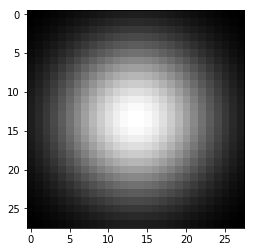

In [7]:
plt.imshow(test, 'gray')
plt.show()

In [19]:
img = test*X_test[2,:,:,0]

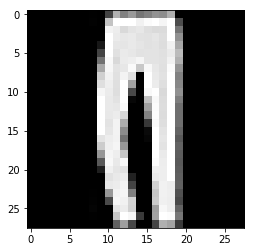

In [22]:
plt.imshow(X_test[2,:,:,0], 'gray')
plt.show()

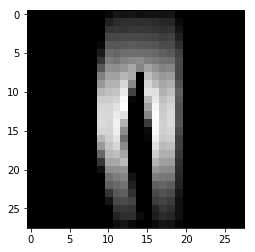

In [21]:
plt.imshow(img, 'gray')
plt.show()

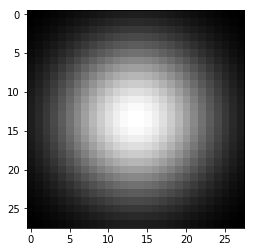

In [11]:
plt.imshow(test, 'gray')
plt.show()

In [7]:
Y.shape

(10, 10)

In [13]:
tf.reset_default_graph()
X = tf.placeholder(dtype=tf.float32, shape=[100, 32, 32, 3], name='X')
a = tf.layers.conv2d(X, filters=2, kernel_size=3, name='conv1')

In [12]:
from utils import mnist_reader
import numpy as np
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
choice = np.random.permutation(60000)

X_train_raw = X_train[choice,:]
y_train_raw = y_train[choice].astype(np.float32)

X_train_mean = np.mean(X_train_raw, axis=0, keepdims=True).reshape(-1,28,28,1)

# X_train_raw = X_train_raw-X_train_mean
X_train_raw = X_train_raw
X_train_raw = X_train_raw.reshape(-1,28,28,1)

X_train = X_train_raw[:50000,:]
y_train = y_train_raw[:50000]
X_valid = X_train_raw[50000:,:]
y_valid = y_train_raw[50000:]

# X_test = X_test-X_train_mean
X_test = X_test.reshape(-1,28,28,1)
y_test = y_test.astype(np.float32)

In [6]:
y_test.dtype

dtype('float32')

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 28, 28, 1) (50000,) (10000, 28, 28, 1) (10000,)


In [43]:
def trans(img, mode=0):
    m = np.shape(img)[0]
    imgOut = np.zeros((m, 28, 28, 1))
    if mode==0:
        imgOut[:,:,2:,:] = img[:,:,0:-2,:]
    elif mode==1:
        imgOut[:,2:,:,:] = img[:,0:-2,:,:]
    elif mode==2:
        imgOut[:,:-2,:,:] = img[:,2:,:,:]
    elif mode==3:
        imgOut[:,:,:-2,:] = img[:,:,2:,:]
    return imgOut
# mirror
choice = np.random.permutation(20000)
X_mirror = np.flip(X_train[choice,:], axis=2)
y_mirror = y_train[choice]

# flip
choice = np.random.permutation(20000)
X_flip = np.flip(X_train[choice,:], axis=1)
y_flip = y_train[choice]

# trans
choice = np.random.permutation(20000)
X_trans1 = trans(X_train[choice,:], 0)
y_trans1 = y_train[choice]

choice = np.random.permutation(20000)
X_trans2 = trans(X_train[choice,:], 1)
y_trans2 = y_train[choice]

choice = np.random.permutation(20000)
X_trans3 = trans(X_train[choice,:], 2)
y_trans3 = y_train[choice]

choice = np.random.permutation(20000)
X_trans4 = trans(X_train[choice,:], 3)
y_trans4 = y_train[choice]

# light
choice = np.random.permutation(5000)
X_light = X_train[choice,:]+np.random.randn(28,28,1)*0.2+5
y_light = y_train[choice]

choice = np.random.permutation(5000)
X_dark = X_train[choice,:]+np.random.randn(28,28,1)*0.2-5
y_dark = y_train[choice]

choice = np.random.permutation(5000)
X_light_plus = X_train[choice,:]+np.random.randn(28,28,1)*0.2+5
y_light_plus = y_train[choice]

choice = np.random.permutation(5000)
X_dark_plus = X_train[choice,:]+np.random.randn(28,28,1)*0.2-5
y_dark_plus = y_train[choice]


X_train_argu, y_train_argu = 0, 0
X_train_argu = np.append(X_train, X_mirror, axis=0)
X_train_argu = np.append(X_train_argu, X_flip, axis=0)
X_train_argu = np.append(X_train_argu, X_trans1, axis=0)
X_train_argu = np.append(X_train_argu, X_trans2, axis=0)
X_train_argu = np.append(X_train_argu, X_trans3, axis=0)
X_train_argu = np.append(X_train_argu, X_trans4, axis=0)
X_train_argu = np.append(X_train_argu, X_light, axis=0)
X_train_argu = np.append(X_train_argu, X_dark, axis=0)
X_train_argu = np.append(X_train_argu, X_light_plus, axis=0)
X_train_argu = np.append(X_train_argu, X_dark_plus, axis=0)

y_train_argu = np.append(y_train, y_mirror)
y_train_argu = np.append(y_train_argu, y_flip)
y_train_argu = np.append(y_train_argu, y_trans1)
y_train_argu = np.append(y_train_argu, y_trans2)
y_train_argu = np.append(y_train_argu, y_trans3)
y_train_argu = np.append(y_train_argu, y_trans4)
y_train_argu = np.append(y_train_argu, y_light)
y_train_argu = np.append(y_train_argu, y_dark)
y_train_argu = np.append(y_train_argu, y_light_plus)
y_train_argu = np.append(y_train_argu, y_dark_plus)

In [4]:
X_mean = np.mean(X_train_argu, axis=0, keepdims=True)

NameError: name 'X_train_argu' is not defined

In [ ]:
X_mean = np.mean(X_train_argu, axis=0, keepdims=True)

In [5]:
data = (X_train_argu-X_train_mean, y_train_argu, X_valid-X_train_mean, y_valid, X_test-X_train_mean, y_test)

NameError: name 'X_train_argu' is not defined

In [8]:
data_without_argu = (X_train/255, y_train, X_valid/255, y_valid, X_test/255, y_test)

In [23]:
y_test.dtype

dtype('float32')

In [5]:
X_train_mean.shape

(1, 784)

In [7]:
X_test.shape[1]

28

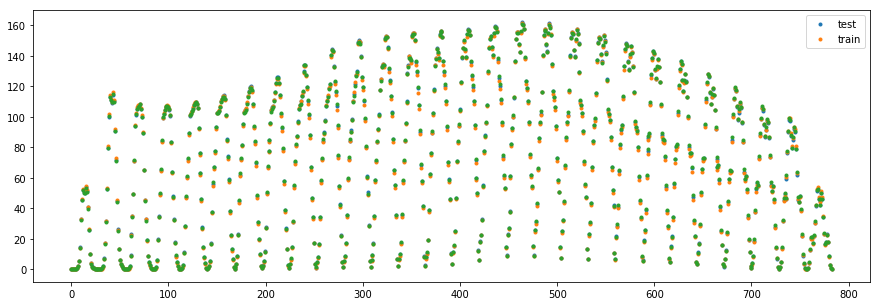

In [32]:
plt.figure(figsize=[15,5])
plt.plot(np.mean(X_train, axis=0).reshape(-1,1), '.')
plt.plot(np.mean(X_valid, axis=0).reshape(-1,1), '.')
plt.plot(np.mean(X_test, axis=0).reshape(-1,1), '.')
plt.legend(['test','train'])
plt.show()

In [20]:
tf.trainable_variables()

[<tf.Variable 'calculate_mu1/conv1/W:0' shape=(3, 3, 1, 32) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv1/b:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv1/scale:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv1/offset:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv2/W:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv2/b:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv2/scale:0' shape=(1, 1, 1, 64) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv2/offset:0' shape=(1, 1, 1, 64) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv3/W:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv3/b:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv3/scale:0' shape=(1, 1, 1, 128) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/conv3/offset:0' shape=(1, 1, 1, 128) dtype=float32_ref>,
 <tf.Variable 'calculate_mu1/co

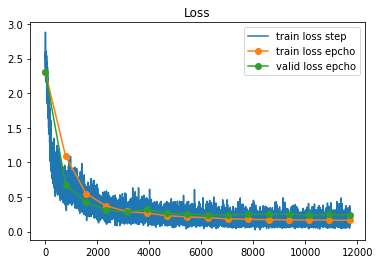

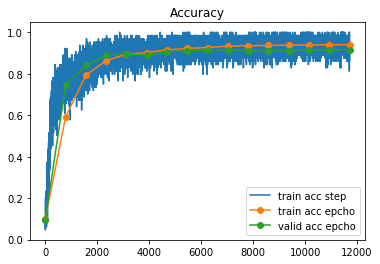

In [52]:
cnnmodel.show_log()

In [82]:
cnnmodel.see_gauss(sess, X_test[0:1,:,:,:])

[array([[[[-0.0001611]]]], dtype=float32),
 array([[[[ 0.00012319]]]], dtype=float32),
 array([[[[ 0.50005996]]]], dtype=float32),
 array([[[[ 0.50039238]]]], dtype=float32),
 array([[[[ -7.93256622e-05]]]], dtype=float32)]

In [93]:
cnnmodel.see_gauss(sess, X_test[0:1,:,:,:])

[array([[[[-0.99999899]]]], dtype=float32),
 array([[[[ 1.00000095]]]], dtype=float32),
 array([[[[ 1.00000095]]]], dtype=float32),
 array([[[[ 1.00000095]]]], dtype=float32),
 array([[[[ 0.99900097]]]], dtype=float32)]

In [7]:
tf.reset_default_graph()
cnnmodel = GaussNet_Model(epchos=2, seed=10, batch_size=64, reg=0, starter_learning_rate=1e-4, decay_steps=2000, decay_rate=0.3)
cnnmodel.get_variable()
cnnmodel.get_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())
# cnnmodel.run(sess, data_without_argu)

In [92]:
cnnmodel.run(sess, data_without_argu)

epoch 0 Loss: train 2.30259, valid 2.30259, acc: train 0.07329, valid 0.07783
epoch 1 Loss: train 0.67492, valid 0.40684, acc: train 0.76597, valid 0.85092
global step 781, learning rate 0.000100
epoch 2 Loss: train 0.38131, valid 0.35869, acc: train 0.86390, valid 0.86973
global step 1562, learning rate 0.000100


In [9]:
tf.reset_default_graph()
cnnmodel = ResNet_Model(epchos=15, seed=10, batch_size=64, reg=0, starter_learning_rate=1e-1, decay_steps=1000, decay_rate=0.3)
cnnmodel.get_variable()
cnnmodel.get_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())
cnnmodel.run(sess, data_without_argu)

KeyboardInterrupt: 

In [8]:
cnnmodel.run(sess, data_without_argu)

epoch 0 Loss: train 18.06272, valid 18.29497, acc: train 0.10150, valid 0.09275


KeyboardInterrupt: 

In [7]:
saver = tf.train.Saver()
saver.restore(sess, "model.ckpt")
print("Model restored.")

# 内存小, 计算量较大需要分批
X_out = X_test - 255

X_out = X_out.reshape(-1,28,28,1)
data = (X_out, y_test)
print(cnnmodel.evaluate(sess, (X_test-255, y_test)))

INFO:tensorflow:Restoring parameters from model.ckpt
Model restored.
(0.32408909888783838, 0.91560509554140124)


In [27]:
cnnmodel.evaluate(sess, (X_test-255, y_test))

(0.32408909888783838, 0.91560509554140124)

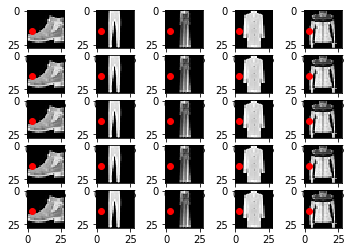

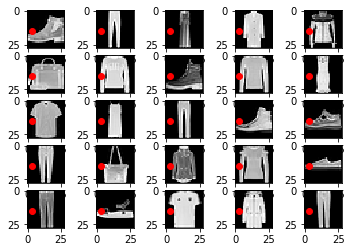

In [57]:
for k in range(0,2):
    plt.figure(k)
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot(5, 5, i*5+j+1)
            plt.imshow(X_train[k*i*20+j,:].reshape(28,28), 'gray')
            plt.plot(3,15,'ro')
plt.show()

In [75]:
# tf.reset_default_graph()
# cnnmodel = GaussNet_Model(epchos=15, seed=10, batch_size=64, reg=0, decay_steps=2000, decay_rate=0.3)
# cnnmodel.get_variable()
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.Session(config=config)

# X = tf.placeholder(dtype=tf.float32, name='X', shape=[None,28,28,1])

# sess.run(tf.global_variables_initializer())


out = cnnmodel.see_gauss(sess, X_test[0:1,:,:,:])

AttributeError: 'GaussNet_Model' object has no attribute 'gauss_list'

In [73]:
sess.run([op_mu1, op_mu2, op_sigma1, op_simga2, op_ro], feed_dict={X:np.zeros((1,28,28,1))})

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("X_1:0", shape=(?, 28, 28, 1), dtype=float32) is not an element of this graph.

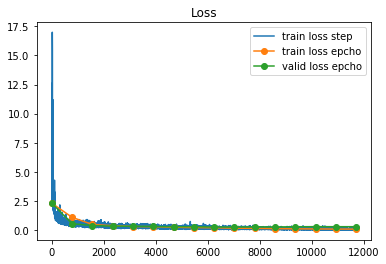

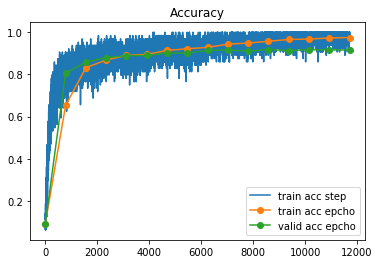

In [9]:
cnnmodel.show_log()

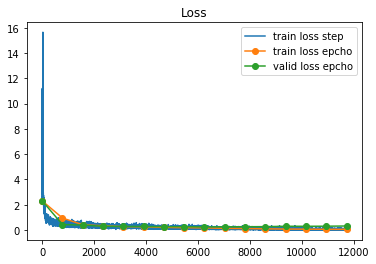

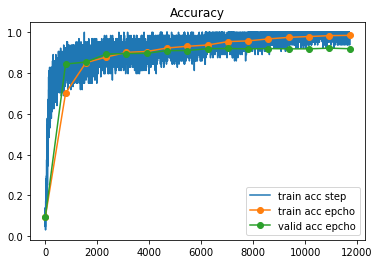

In [22]:
cnnmodel.show_log()

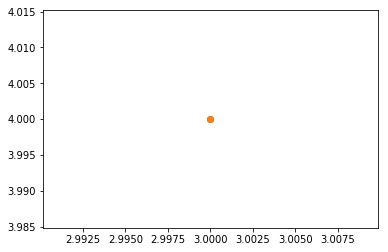

In [37]:
plt.scatter(3,4)
plt.show()

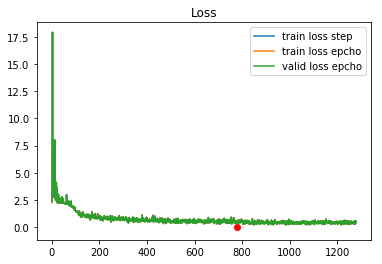

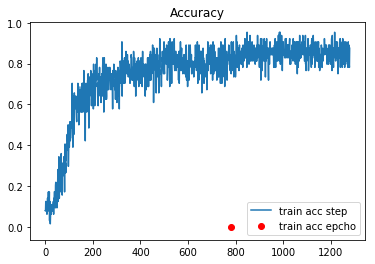

In [44]:
style = '-o'
self = cnnmodel
plt.plot(self.log['train_loss']['x'], self.log['train_loss']['y'])
# plt.plot(self.log['train_loss_epcho']['x'], self.log['train_loss_epcho']['y'], style)
# plt.plot(self.log['valid_loss_epcho']['x'], self.log['valid_loss_epcho']['y'], style)
plt.scatter(780,0,c='r')
plt.legend(['train loss step', 'train loss epcho', 'valid loss epcho'])
plt.title('Loss')
plt.show()
plt.plot(self.log['train_acc']['x'], self.log['train_acc']['y'])
plt.scatter(780,0,c='r')
# plt.plot(self.log['train_acc_epcho']['x'], self.log['train_acc_epcho']['y'], style)
# plt.plot(self.log['valid_acc_epcho']['x'], self.log['valid_acc_epcho']['y'], style)
plt.legend(['train acc step', 'train acc epcho', 'valid acc epcho'])
plt.title('Accuracy')
plt.show()

In [59]:
cnnmodel.log_loss_eval

[0.51502018825263729]

In [58]:
cnnmodel.log_idex_eval

[782]

In [43]:
from model import *

In [8]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)
cnnmodel = gauss_model()
cnnmodel.get_varibale()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# X_train_with_flip = np.append(X_train, np.flip(X_train, axis=2), axis=0)
# y_train_with_flip = np.append(y_train, y_train, axis=0)
# data = (X_train_with_flip, y_train_with_flip, X_valid, y_valid, X_test, y_test)
cnnmodel.do_it(sess, data_without_argu, epchos=100, batch_size=128, 
                      reg = 0.0001, 
                      starter_learning_rate=1e-2, decay_steps=1000, decay_rate=0.2)

Tensor("conv1_1/pool:0", shape=(?, 13, 13, 32), dtype=float32)
Tensor("conv2_1/pool:0", shape=(?, 6, 6, 64), dtype=float32)
Tensor("conv3_1/relu:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("conv3_1/AvgPool:0", shape=(?, 1, 1, 128), dtype=float32)
Tensor("conv1_2/pool:0", shape=(?, 13, 13, 32), dtype=float32)
Tensor("conv2_2/pool:0", shape=(?, 6, 6, 64), dtype=float32)
Tensor("conv3_2/relu:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("conv3_2/AvgPool:0", shape=(?, 1, 1, 128), dtype=float32)
epoch 0 Loss: train 2.33506, valid 2.33501, test 2.33370, acc: train 0.09957, valid 0.10265, test 0.10097
epoch 1 Loss: train 0.64339, valid 0.48223, test 0.49988, acc: train 0.77868, valid 0.84266, test 0.83554
global step 391, learning rate 0.010000
epoch 2 Loss: train 0.44925, valid 0.46365, test 0.47411, acc: train 0.85534, valid 0.85898, test 0.85433
global step 782, learning rate 0.010000
epoch 3 Loss: train 0.38424, valid 0.34211, test 0.36056, acc: train 0.88183, valid 0.89577, test 0.

epoch 53 Loss: train 0.20976, valid 0.27432, test 0.29549, acc: train 0.94180, valid 0.91733, test 0.91040
global step 20723, learning rate 0.000000
epoch 54 Loss: train 0.20911, valid 0.28200, test 0.29725, acc: train 0.94216, valid 0.91683, test 0.91030
global step 21114, learning rate 0.000000
epoch 55 Loss: train 0.20951, valid 0.28068, test 0.29828, acc: train 0.94152, valid 0.91703, test 0.90843
global step 21505, learning rate 0.000000
epoch 56 Loss: train 0.21035, valid 0.27359, test 0.29167, acc: train 0.94169, valid 0.91604, test 0.91466
global step 21896, learning rate 0.000000
epoch 57 Loss: train 0.20907, valid 0.27710, test 0.29368, acc: train 0.94180, valid 0.91663, test 0.91070
global step 22287, learning rate 0.000000
epoch 58 Loss: train 0.20960, valid 0.27494, test 0.29448, acc: train 0.94221, valid 0.91663, test 0.91021
global step 22678, learning rate 0.000000
epoch 59 Loss: train 0.20938, valid 0.28302, test 0.30443, acc: train 0.94195, valid 0.91426, test 0.90744

In [63]:
tf.reset_default_graph()
cnnmodel = model()
cnnmodel.get_resnet_param()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# X_train_with_flip = np.append(X_train, np.flip(X_train, axis=2), axis=0)
# y_train_with_flip = np.append(y_train, y_train, axis=0)
# data = (X_train_with_flip, y_train_with_flip, X_valid, y_valid, X_test, y_test)
cnnmodel.do_it_resnet(sess, data_without_argu, epchos=50, batch_size=128, 
                      reg = 0, 
                      starter_learning_rate=1e-2, decay_steps=3500, decay_rate=0.2)

NameError: name 'model' is not defined

In [14]:
X = tf.placeholder(dtype=tf.float32, name='X_in', shape=[None, 28, 28, 1])
y = tf.placeholder(dtype=tf.int32, name='y_in', shape=[None])

cnnmodel.predict_cnn(sess, (X_test-X_mean, y_test), (X,y))

Tensor("X_in:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv1_3/pool:0", shape=(?, 13, 13, 32), dtype=float32)
Tensor("conv2_3/pool:0", shape=(?, 6, 6, 64), dtype=float32)
Tensor("conv3_3/relu:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("conv3_3/AvgPool:0", shape=(?, 1, 1, 128), dtype=float32)
Tensor("conv4_3/relu:0", shape=(?, 1, 1, 256), dtype=float32)
Tensor("conv4_3/relu:0", shape=(?, 1, 1, 256), dtype=float32)


0.90743670886075944

In [9]:
saver = tf.train.Saver()
save_path = saver.save(sess, "model.ckpt")
print("Model saved in file: %s" % save_path)

Model saved in file: model.ckpt


In [7]:
tf.reset_default_graph()
cnnmodel = model()
cnnmodel.get_resnet_param()

sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, "model.ckpt")
print("Model restored.")

ValueError: No variables to save

In [12]:
with tf.variable_scope('conv1', reuse=True):
    W = tf.get_variable('W')
    wp = sess.run(W)
plt.figure(figsize=[5,5])
mx = np.max(wp)
mn = np.min(wp)
for i in range(4):
    for j in range(8):
        plt.subplot(4,8,i*8+j+1)
        wb = wp[:,:,:,i*8+j]
        test = (wb-mn)/(mx-mn)
        plt.imshow(test.reshape((3,3)), 'gray')
plt.show()

FailedPreconditionError: Attempting to use uninitialized value conv1/W
	 [[Node: conv1/W/_0 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_4_conv1/W", _device="/job:localhost/replica:0/task:0/gpu:0"](conv1/W)]]
	 [[Node: conv1/W/_1 = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_4_conv1/W", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

In [42]:
np.uint8(test.reshape((7,7)))

array([[4, 5, 3, 6, 4, 6, 4],
       [6, 2, 5, 5, 0, 4, 4],
       [2, 6, 3, 5, 4, 5, 4],
       [5, 5, 5, 8, 5, 4, 5],
       [4, 7, 5, 3, 3, 7, 4],
       [3, 6, 7, 2, 7, 5, 6],
       [2, 2, 6, 0, 3, 3, 4]], dtype=uint8)

In [52]:
with tf.variable_scope('stage1', reuse=True):
    W = tf.get_variable('W')
    wp = sess.run(W)
plt.figure(figsize=[5,5])

for i in range(8):
    for j in range(8):
        plt.subplot(8,8,i*8+j+1)
        wb = wp[:,:,:,i*8+j]
        mx = np.max(wb)
        mn = np.min(wb)
        test = (wb-mn)/(mx-mn)*5.0
        plt.imshow(np.float16(test.reshape((7,7))), 'gray')
plt.show()

ValueError: Unsupported dtype

In [35]:
mx

1.6744643

In [36]:
mn

-2.4627931

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


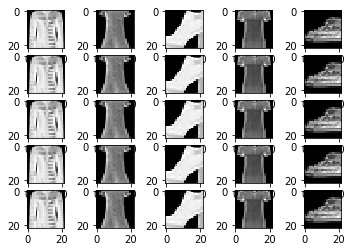

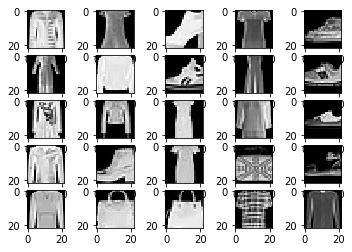

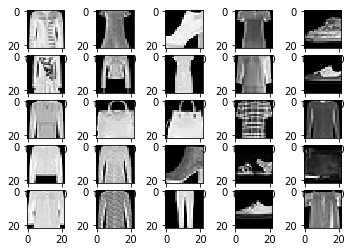

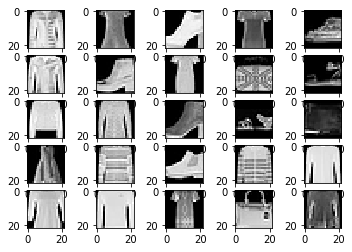

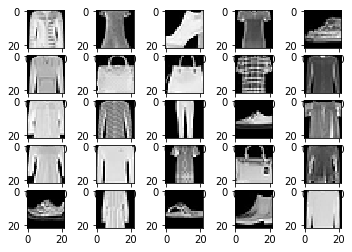

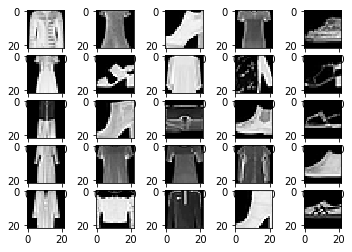

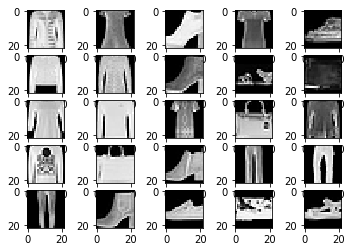

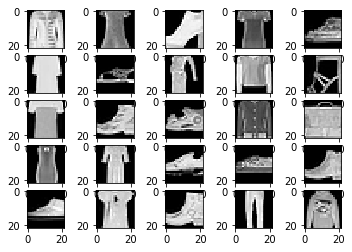

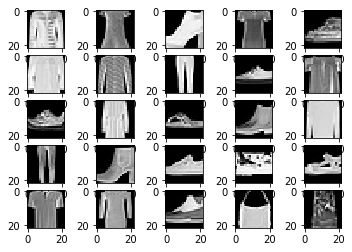

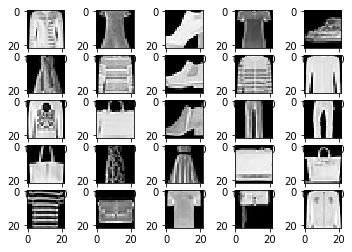

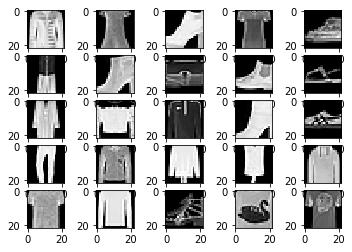

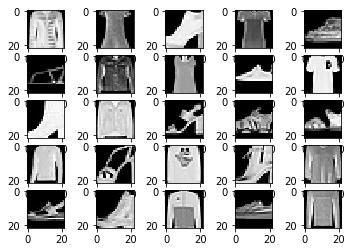

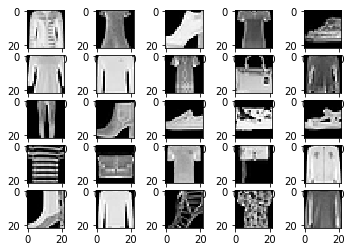

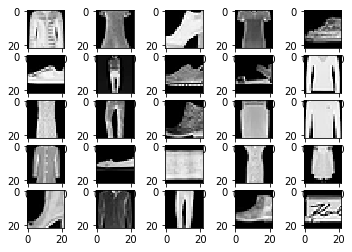

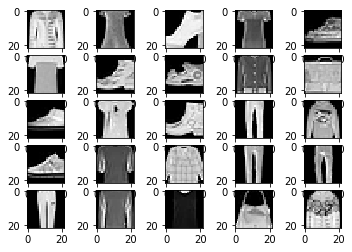

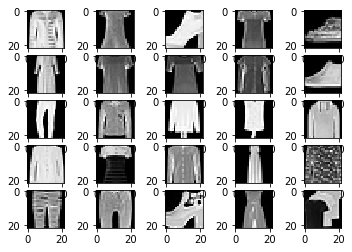

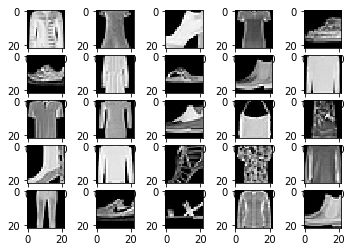

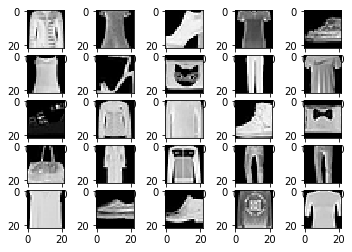

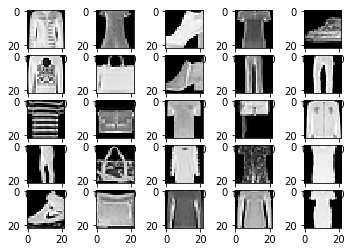

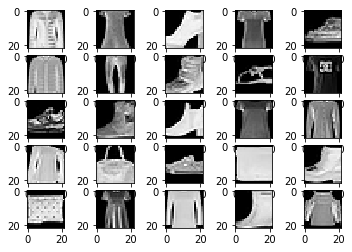

In [13]:
for k in range(0,20):
    plt.figure(k)
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot(5, 5, i*5+j+1)
            plt.imshow(X_train_input[k*i*20+j,:].reshape(22,22), 'gray')
plt.show()

In [84]:
for i in data:
    print(np.shape(i))

(81000, 28, 28, 1)
(81000,)
(10000, 28, 28, 1)
(10000,)
(10000, 28, 28, 1)
(10000,)


In [17]:
from model import *

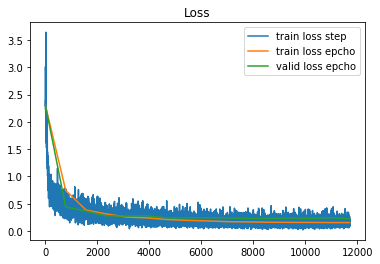

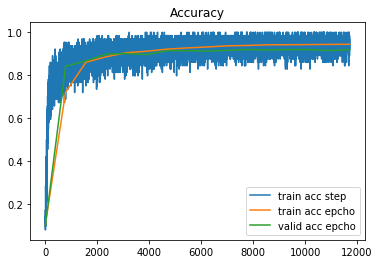

In [50]:
cnnmodel.show_log('-')

In [36]:
with open('min_loss1.txt', 'r+') as fp:
    fp.write('hello23')
    fp.

In [37]:
with open('min_loss1.txt', 'r+') as fp:
    line = fp.readline()

In [38]:
line

'hello23'

In [16]:
fp = open('min_loss1.txt', 'r+')
# fp.truncate()
fp.write(str(0.9))
fp.seek(0,0)
for line in fp:
    print(line)
fp.truncate()
for line in fp:
    print(line)
fp.close()

0.9


In [23]:
with open('min_loss1.txt', 'r+') as fp:
    line = fp.readline()
    tmp_acc = float(line)
    print("Model saved in file: %s" % line)
    fp.seek(0,0)
    fp.truncate()
    fp.write(str(tmp_acc))

Model saved in file: 0.8
